In [1]:
import pandas as pd
import numpy as np

In [2]:
matches = pd.read_csv('understat.com.csv')

In [3]:
matches.rename(columns = {'Unnamed: 0':'league', 'Unnamed: 1': 'year'}, inplace = True)

In [4]:
matches[['team','ppda_coef','oppda_coef']]

,team,ppda_coef,oppda_coef
0,Barcelona,5.683535,16.367593
1,Real Madrid,10.209085,12.929510
2,Atletico Madrid,8.982028,9.237091
3,Valencia,8.709827,7.870225
4,Sevilla,8.276148,9.477805
...,...,...,...
679,PFC Sochi,12.838079,10.562327
680,FK Akhmat,11.199502,10.806357
681,Krylya Sovetov Samara,11.949903,10.080858
682,FC Tambov,14.666049,9.192768


In [5]:
matches['ppda_coef'].describe()

count    684.000000
mean      10.911784
std        2.521398
min        5.683535
25%        9.090617
50%       10.562543
75%       12.434874
max       21.896752
Name: ppda_coef, dtype: float64

In [6]:
matches_per_game = pd.read_csv('understat_per_game.csv')

In [7]:
matches_per_game[matches_per_game['team']=='Barcelona']

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
8612,La_liga,2014,h,1.541240,0.108040,1.541240,0.108040,12,0,3,...,6.545455,216,33,18.392857,515,28,Barcelona,-1.458760,0.108040,-0.3950
8613,La_liga,2014,a,3.125450,1.108360,3.125450,1.108360,11,5,1,...,3.750000,120,32,21.400000,321,15,Barcelona,2.125450,1.108360,-0.3126
8614,La_liga,2014,h,2.177200,0.097971,2.177200,0.097971,14,3,2,...,8.451613,262,31,11.352941,386,34,Barcelona,0.177200,0.097971,-0.1803
8615,La_liga,2014,a,3.822900,0.441980,3.079620,0.441980,14,0,5,...,7.000000,154,22,23.833333,429,18,Barcelona,-1.177100,0.441980,-0.0664
8616,La_liga,2014,a,0.646364,0.278657,0.646364,0.278657,7,4,0,...,4.571429,96,21,9.451613,293,31,Barcelona,0.646364,0.278657,0.6659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12331,La_liga,2019,a,2.752940,0.961984,2.752940,0.961984,22,8,4,...,10.318182,227,22,29.222222,526,18,Barcelona,-1.247060,-0.038016,-0.4711
12332,La_liga,2019,h,0.897655,0.830636,0.897655,0.830636,10,2,1,...,11.230769,146,13,28.500000,399,14,Barcelona,-0.102345,0.830636,-1.5934
12333,La_liga,2019,a,1.021090,0.849569,1.021090,0.849569,10,1,1,...,7.517241,218,29,21.285714,447,21,Barcelona,0.021090,0.849569,-1.5107
12334,La_liga,2019,h,1.149810,0.672683,1.149810,0.672683,16,3,1,...,5.875000,94,16,28.000000,336,12,Barcelona,0.149810,-1.327317,1.7126


In [8]:
#ppda_coef shows a teams high press willingness <10 is high-press which shows that opponents are mostly in a deep block
#oppda_coef is the opposite the opposition teams high press willingness if >14 it is low block

In [9]:
matches_per_game['low_block'] = np.nan

In [10]:
condition = matches_per_game['oppda_coef'] >= 20

In [11]:
matches_per_game.loc[condition, 'low_block'] = 1

In [12]:
matches_per_game = matches_per_game.replace(np.nan, 0)

In [13]:
matches_per_game

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,low_block
0,Bundesliga,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,...,231,24,21.850000,437,20,Bayern Munich,0.570120,0.198420,-0.6514,1.0
1,Bundesliga,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,...,195,41,17.695652,407,23,Bayern Munich,0.503280,0.307950,0.5143,0.0
2,Bundesliga,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,...,167,33,16.961538,441,26,Bayern Munich,-0.770130,0.310166,-0.8412,0.0
3,Bundesliga,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,...,115,26,9.446809,444,47,Bayern Munich,1.035190,0.203118,1.1367,0.0
4,Bundesliga,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,...,170,40,44.800000,448,10,Bayern Munich,-0.517140,0.402844,-0.0713,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,Serie_A,2019,h,0.448154,2.587650,0.448154,1.826350,7,6,1,...,310,20,19.600000,294,15,Lecce,-0.551846,-0.412350,0.1597,0.0
24576,Serie_A,2019,a,1.699320,0.446679,0.938022,0.446679,5,7,1,...,253,20,14.600000,292,20,Lecce,0.699320,-1.553321,2.4418,0.0
24577,Serie_A,2019,h,2.535110,0.959100,2.535110,0.959100,5,7,3,...,248,18,12.888889,348,27,Lecce,-0.464890,-0.040900,-0.5675,0.0
24578,Serie_A,2019,a,2.247360,2.689270,2.247360,2.689270,11,10,2,...,280,11,10.600000,212,20,Lecce,0.247360,-0.310730,1.1019,0.0


In [14]:
matches_per_game_2 = pd.read_csv('understat_per_game.csv')

In [15]:
matches_per_game_2['low_block'] = np.nan

In [16]:
matches_per_game_2['mid_block'] = np.nan

In [17]:
matches_per_game_2['high_block'] = np.nan

In [18]:
matches_per_game_2

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,low_block,mid_block,high_block
0,Bundesliga,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,...,21.850000,437,20,Bayern Munich,0.570120,0.198420,-0.6514,NaN,NaN,NaN
1,Bundesliga,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,...,17.695652,407,23,Bayern Munich,0.503280,0.307950,0.5143,NaN,NaN,NaN
2,Bundesliga,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,...,16.961538,441,26,Bayern Munich,-0.770130,0.310166,-0.8412,NaN,NaN,NaN
3,Bundesliga,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,...,9.446809,444,47,Bayern Munich,1.035190,0.203118,1.1367,NaN,NaN,NaN
4,Bundesliga,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,...,44.800000,448,10,Bayern Munich,-0.517140,0.402844,-0.0713,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,Serie_A,2019,h,0.448154,2.587650,0.448154,1.826350,7,6,1,...,19.600000,294,15,Lecce,-0.551846,-0.412350,0.1597,NaN,NaN,NaN
24576,Serie_A,2019,a,1.699320,0.446679,0.938022,0.446679,5,7,1,...,14.600000,292,20,Lecce,0.699320,-1.553321,2.4418,NaN,NaN,NaN
24577,Serie_A,2019,h,2.535110,0.959100,2.535110,0.959100,5,7,3,...,12.888889,348,27,Lecce,-0.464890,-0.040900,-0.5675,NaN,NaN,NaN
24578,Serie_A,2019,a,2.247360,2.689270,2.247360,2.689270,11,10,2,...,10.600000,212,20,Lecce,0.247360,-0.310730,1.1019,NaN,NaN,NaN


In [19]:
condition_low = matches_per_game_2['oppda_coef'] >= 20
condition_mid = (matches_per_game_2['oppda_coef'] >= 10) & (matches_per_game_2['oppda_coef'] < 20)
condition_high = matches_per_game_2['oppda_coef'] < 10

In [20]:
matches_per_game_2.loc[condition_low, 'low_block'] = 1
matches_per_game_2.loc[condition_mid, 'mid_block'] = 1
matches_per_game_2.loc[condition_high, 'high_block'] = 1

In [21]:
matches_per_game_2 = matches_per_game_2.replace(np.nan, 0)

In [22]:
matches_per_game_2

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,low_block,mid_block,high_block
0,Bundesliga,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,...,21.850000,437,20,Bayern Munich,0.570120,0.198420,-0.6514,1.0,0.0,0.0
1,Bundesliga,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,...,17.695652,407,23,Bayern Munich,0.503280,0.307950,0.5143,0.0,1.0,0.0
2,Bundesliga,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,...,16.961538,441,26,Bayern Munich,-0.770130,0.310166,-0.8412,0.0,1.0,0.0
3,Bundesliga,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,...,9.446809,444,47,Bayern Munich,1.035190,0.203118,1.1367,0.0,0.0,1.0
4,Bundesliga,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,...,44.800000,448,10,Bayern Munich,-0.517140,0.402844,-0.0713,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,Serie_A,2019,h,0.448154,2.587650,0.448154,1.826350,7,6,1,...,19.600000,294,15,Lecce,-0.551846,-0.412350,0.1597,0.0,1.0,0.0
24576,Serie_A,2019,a,1.699320,0.446679,0.938022,0.446679,5,7,1,...,14.600000,292,20,Lecce,0.699320,-1.553321,2.4418,0.0,1.0,0.0
24577,Serie_A,2019,h,2.535110,0.959100,2.535110,0.959100,5,7,3,...,12.888889,348,27,Lecce,-0.464890,-0.040900,-0.5675,0.0,1.0,0.0
24578,Serie_A,2019,a,2.247360,2.689270,2.247360,2.689270,11,10,2,...,10.600000,212,20,Lecce,0.247360,-0.310730,1.1019,0.0,1.0,0.0


In [23]:
matches_per_game_2.isna().sum()

league          0
year            0
h_a             0
xG              0
xGA             0
npxG            0
npxGA           0
deep            0
deep_allowed    0
scored          0
missed          0
xpts            0
result          0
date            0
wins            0
draws           0
loses           0
pts             0
npxGD           0
ppda_coef       0
ppda_att        0
ppda_def        0
oppda_coef      0
oppda_att       0
oppda_def       0
team            0
xG_diff         0
xGA_diff        0
xpts_diff       0
low_block       0
mid_block       0
high_block      0
dtype: int64

In [24]:
matches_per_game_2['low_block'].value_counts()

0.0    22899
1.0     1681
Name: low_block, dtype: int64

In [25]:
matches_per_game_2['mid_block'].value_counts()

0.0    14995
1.0     9585
Name: mid_block, dtype: int64

In [26]:
matches_per_game_2['high_block'].value_counts()

1.0    13314
0.0    11266
Name: high_block, dtype: int64

In [27]:
1681 + 9585 + 13314

24580

In [28]:
matches_per_game.describe()

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff,low_block
count,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,...,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000
mean,2016.478438,1.309694,1.309694,1.193872,1.193872,5.806957,5.806957,1.341009,1.341009,1.378563,...,10.904386,239.612327,24.349593,10.904386,239.612327,24.349593,-0.031315,-0.031315,0.004723,0.068389
std,1.699285,0.841109,0.841109,0.774719,0.774719,4.048151,4.048151,1.244176,1.244176,0.823751,...,6.163586,83.998463,7.172098,6.163586,83.998463,7.172098,0.951362,0.951362,1.051608,0.252417
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.943560,-5.943560,-2.965500,0.000000
25%,2015.000000,0.681165,0.681165,0.621734,0.621734,3.000000,3.000000,0.000000,0.000000,0.673950,...,6.962963,179.000000,19.000000,6.962963,179.000000,19.000000,-0.593431,-0.593431,-0.679800,0.000000
50%,2016.000000,1.150595,1.150595,1.040425,1.040425,5.000000,5.000000,1.000000,1.000000,1.328900,...,9.500000,231.000000,24.000000,9.500000,231.000000,24.000000,0.092995,0.092995,0.093950,0.000000
75%,2018.000000,1.769455,1.769455,1.597640,1.597640,8.000000,8.000000,2.000000,2.000000,2.051025,...,13.095622,290.000000,29.000000,13.095622,290.000000,29.000000,0.588477,0.588477,0.739575,0.000000
max,2019.000000,6.630490,6.630490,6.610910,6.610910,42.000000,42.000000,10.000000,10.000000,3.000000,...,152.000000,764.000000,65.000000,152.000000,764.000000,65.000000,5.063130,5.063130,2.940900,1.000000


In [29]:
matches_per_game_2.describe()

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff,low_block,mid_block,high_block
count,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,...,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000
mean,2016.478438,1.309694,1.309694,1.193872,1.193872,5.806957,5.806957,1.341009,1.341009,1.378563,...,24.349593,10.904386,239.612327,24.349593,-0.031315,-0.031315,0.004723,0.068389,0.389951,0.541660
std,1.699285,0.841109,0.841109,0.774719,0.774719,4.048151,4.048151,1.244176,1.244176,0.823751,...,7.172098,6.163586,83.998463,7.172098,0.951362,0.951362,1.051608,0.252417,0.487749,0.498272
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-5.943560,-5.943560,-2.965500,0.000000,0.000000,0.000000
25%,2015.000000,0.681165,0.681165,0.621734,0.621734,3.000000,3.000000,0.000000,0.000000,0.673950,...,19.000000,6.962963,179.000000,19.000000,-0.593431,-0.593431,-0.679800,0.000000,0.000000,0.000000
50%,2016.000000,1.150595,1.150595,1.040425,1.040425,5.000000,5.000000,1.000000,1.000000,1.328900,...,24.000000,9.500000,231.000000,24.000000,0.092995,0.092995,0.093950,0.000000,0.000000,1.000000
75%,2018.000000,1.769455,1.769455,1.597640,1.597640,8.000000,8.000000,2.000000,2.000000,2.051025,...,29.000000,13.095622,290.000000,29.000000,0.588477,0.588477,0.739575,0.000000,1.000000,1.000000
max,2019.000000,6.630490,6.630490,6.610910,6.610910,42.000000,42.000000,10.000000,10.000000,3.000000,...,65.000000,152.000000,764.000000,65.000000,5.063130,5.063130,2.940900,1.000000,1.000000,1.000000


In [30]:
matches_per_game_2.dtypes

league           object
year              int64
h_a              object
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep              int64
deep_allowed      int64
scored            int64
missed            int64
xpts            float64
result           object
date             object
wins              int64
draws             int64
loses             int64
pts               int64
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
team             object
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
low_block       float64
mid_block       float64
high_block      float64
dtype: object

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
condition_loww = matches_per_game_2[condition_low]
condition_midd = matches_per_game_2[condition_mid]
condition_highh = matches_per_game_2[condition_high]

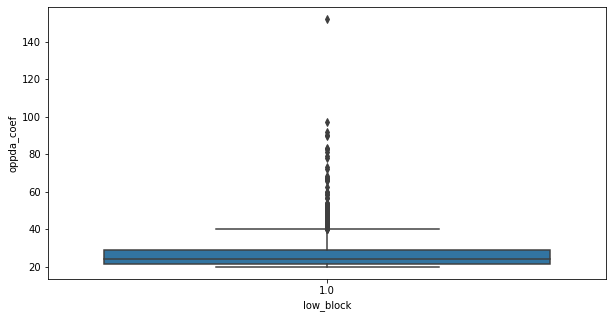

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='low_block', y='oppda_coef',data=condition_loww)
plt.show()

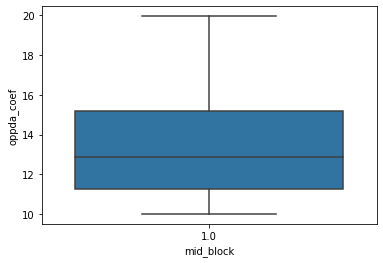

In [34]:
sns.boxplot(x='mid_block', y='oppda_coef',data=condition_midd)
plt.show()

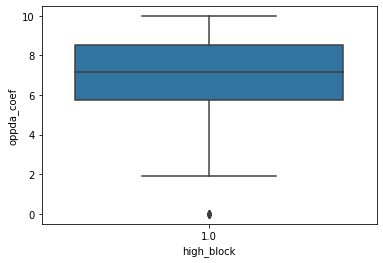

In [35]:
sns.boxplot(x='high_block', y='oppda_coef',data=condition_highh)
plt.show()

In [36]:
matches_per_game_2[matches_per_game_2['team']=='Barcelona']
#Barcelona tend to play with a high press so it seems accurate

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,low_block,mid_block,high_block
8612,La_liga,2014,h,1.541240,0.108040,1.541240,0.108040,12,0,3,...,18.392857,515,28,Barcelona,-1.458760,0.108040,-0.3950,0.0,1.0,0.0
8613,La_liga,2014,a,3.125450,1.108360,3.125450,1.108360,11,5,1,...,21.400000,321,15,Barcelona,2.125450,1.108360,-0.3126,1.0,0.0,0.0
8614,La_liga,2014,h,2.177200,0.097971,2.177200,0.097971,14,3,2,...,11.352941,386,34,Barcelona,0.177200,0.097971,-0.1803,0.0,1.0,0.0
8615,La_liga,2014,a,3.822900,0.441980,3.079620,0.441980,14,0,5,...,23.833333,429,18,Barcelona,-1.177100,0.441980,-0.0664,1.0,0.0,0.0
8616,La_liga,2014,a,0.646364,0.278657,0.646364,0.278657,7,4,0,...,9.451613,293,31,Barcelona,0.646364,0.278657,0.6659,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12331,La_liga,2019,a,2.752940,0.961984,2.752940,0.961984,22,8,4,...,29.222222,526,18,Barcelona,-1.247060,-0.038016,-0.4711,1.0,0.0,0.0
12332,La_liga,2019,h,0.897655,0.830636,0.897655,0.830636,10,2,1,...,28.500000,399,14,Barcelona,-0.102345,0.830636,-1.5934,1.0,0.0,0.0
12333,La_liga,2019,a,1.021090,0.849569,1.021090,0.849569,10,1,1,...,21.285714,447,21,Barcelona,0.021090,0.849569,-1.5107,1.0,0.0,0.0
12334,La_liga,2019,h,1.149810,0.672683,1.149810,0.672683,16,3,1,...,28.000000,336,12,Barcelona,0.149810,-1.327317,1.7126,1.0,0.0,0.0


In [37]:
matches_per_game_2[matches_per_game_2['team']=='Atletico Madrid']
#Atletico tend to play with a low or a mid block, then dont press high so it seems about right too

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,low_block,mid_block,high_block
8460,La_liga,2014,a,0.901586,0.357337,0.901586,0.357337,3,3,0,...,6.920000,173,25,Atletico Madrid,0.901586,0.357337,0.8987,0.0,0.0,1.0
8461,La_liga,2014,h,1.371460,0.855113,1.371460,0.855113,1,6,2,...,4.433333,133,30,Atletico Madrid,-0.628540,-0.144887,-1.2068,0.0,0.0,1.0
8462,La_liga,2014,a,1.110540,1.587780,1.110540,0.844502,0,5,2,...,4.857143,136,28,Atletico Madrid,-0.889460,0.587780,-2.0423,0.0,0.0,1.0
8463,La_liga,2014,h,2.428680,0.926164,2.428680,0.182886,12,4,2,...,8.388889,151,18,Atletico Madrid,0.428680,-1.073836,1.4190,0.0,0.0,1.0
8464,La_liga,2014,a,1.689000,0.263228,1.689000,0.263228,11,1,1,...,13.250000,265,20,Atletico Madrid,0.689000,0.263228,-0.5166,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,La_liga,2019,h,2.651750,0.595505,1.908600,0.595505,18,4,3,...,14.684211,279,19,Atletico Madrid,-0.348250,0.595505,-0.2947,0.0,1.0,0.0
12218,La_liga,2019,a,1.092800,0.281854,1.092800,0.281854,5,2,1,...,7.740741,209,27,Atletico Madrid,0.092800,-0.718146,1.2215,0.0,0.0,1.0
12219,La_liga,2019,h,0.763570,1.169400,0.763570,1.169400,4,9,1,...,12.625000,202,16,Atletico Madrid,-0.236430,1.169400,-1.9976,0.0,1.0,0.0
12220,La_liga,2019,a,1.743410,1.138730,1.743410,1.138730,8,3,2,...,10.500000,336,32,Atletico Madrid,-0.256590,1.138730,-1.1178,0.0,1.0,0.0


In [38]:
matches_per_game_2.drop(['league','team','date'], axis='columns', inplace=True)

In [39]:
matches_per_game_2["block"] = np.where(matches_per_game_2["low_block"] == 1, 0, np.where(matches_per_game_2["mid_block"] == 1, 1, np.where(matches_per_game_2["high_block"] == 1, 2, 0)))
#low_block=0, mid_block=1, high_block=2

In [40]:
matches_per_game_2 = matches_per_game_2.drop(["low_block", "mid_block", "high_block"], axis=1)

In [41]:
matches_per_game_2

,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff,block
0,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,1,...,9.625000,231,24,21.850000,437,20,0.570120,0.198420,-0.6514,0
1,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,1,...,4.756098,195,41,17.695652,407,23,0.503280,0.307950,0.5143,1
2,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,0,...,5.060606,167,33,16.961538,441,26,-0.770130,0.310166,-0.8412,1
3,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,0,...,4.423077,115,26,9.446809,444,47,1.035190,0.203118,1.1367,2
4,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,0,...,4.250000,170,40,44.800000,448,10,-0.517140,0.402844,-0.0713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,2019,h,0.448154,2.587650,0.448154,1.826350,7,6,1,3,...,15.500000,310,20,19.600000,294,15,-0.551846,-0.412350,0.1597,1
24576,2019,a,1.699320,0.446679,0.938022,0.446679,5,7,1,2,...,12.650000,253,20,14.600000,292,20,0.699320,-1.553321,2.4418,1
24577,2019,h,2.535110,0.959100,2.535110,0.959100,5,7,3,1,...,13.777778,248,18,12.888889,348,27,-0.464890,-0.040900,-0.5675,1
24578,2019,a,2.247360,2.689270,2.247360,2.689270,11,10,2,3,...,25.454545,280,11,10.600000,212,20,0.247360,-0.310730,1.1019,1


In [42]:
encoded_matches_per_game_2 = pd.get_dummies(matches_per_game_2, columns = ['h_a', 'result'])

In [43]:
encoded_matches_per_game_2['h_a_a'] = encoded_matches_per_game_2['h_a_a'].astype('int64')
encoded_matches_per_game_2['h_a_h'] = encoded_matches_per_game_2['h_a_h'].astype('int64')
encoded_matches_per_game_2['result_d'] = encoded_matches_per_game_2['result_d'].astype('int64')
encoded_matches_per_game_2['result_l'] = encoded_matches_per_game_2['result_l'].astype('int64')
encoded_matches_per_game_2['result_w'] = encoded_matches_per_game_2['result_w'].astype('int64')

In [44]:
encoded_matches_per_game_2

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,oppda_def,xG_diff,xGA_diff,xpts_diff,block,h_a_a,h_a_h,result_d,result_l,result_w
0,2014,2.570120,1.198420,2.570120,1.198420,5,4,2,1,2.3486,...,20,0.570120,0.198420,-0.6514,0,0,1,0,0,1
1,2014,1.503280,1.307950,1.503280,1.307950,10,1,1,1,1.5143,...,23,0.503280,0.307950,0.5143,1,1,0,1,0,0
2,2014,1.229870,0.310166,1.229870,0.310166,13,3,2,0,2.1588,...,26,-0.770130,0.310166,-0.8412,1,0,1,0,0,1
3,2014,1.035190,0.203118,1.035190,0.203118,6,2,0,0,2.1367,...,47,1.035190,0.203118,1.1367,2,1,0,1,0,0
4,2014,3.482860,0.402844,3.482860,0.402844,23,2,4,0,2.9287,...,10,-0.517140,0.402844,-0.0713,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,2019,0.448154,2.587650,0.448154,1.826350,7,6,1,3,0.1597,...,15,-0.551846,-0.412350,0.1597,1,0,1,0,1,0
24576,2019,1.699320,0.446679,0.938022,0.446679,5,7,1,2,2.4418,...,20,0.699320,-1.553321,2.4418,1,1,0,0,1,0
24577,2019,2.535110,0.959100,2.535110,0.959100,5,7,3,1,2.4325,...,27,-0.464890,-0.040900,-0.5675,1,0,1,0,0,1
24578,2019,2.247360,2.689270,2.247360,2.689270,11,10,2,3,1.1019,...,20,0.247360,-0.310730,1.1019,1,1,0,0,1,0


In [45]:
encoded_matches_per_game_2.describe()

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,oppda_def,xG_diff,xGA_diff,xpts_diff,block,h_a_a,h_a_h,result_d,result_l,result_w
count,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,...,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.00000,24580.00000,24580.000000,24580.000000,24580.000000
mean,2016.478438,1.309694,1.309694,1.193872,1.193872,5.806957,5.806957,1.341009,1.341009,1.378563,...,24.349593,-0.031315,-0.031315,0.004723,1.473271,0.50000,0.50000,0.252319,0.373841,0.373841
std,1.699285,0.841109,0.841109,0.774719,0.774719,4.048151,4.048151,1.244176,1.244176,0.823751,...,7.172098,0.951362,0.951362,1.051608,0.621353,0.50001,0.50001,0.434352,0.483832,0.483832
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.943560,-5.943560,-2.965500,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,2015.000000,0.681165,0.681165,0.621734,0.621734,3.000000,3.000000,0.000000,0.000000,0.673950,...,19.000000,-0.593431,-0.593431,-0.679800,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,2016.000000,1.150595,1.150595,1.040425,1.040425,5.000000,5.000000,1.000000,1.000000,1.328900,...,24.000000,0.092995,0.092995,0.093950,2.000000,0.50000,0.50000,0.000000,0.000000,0.000000
75%,2018.000000,1.769455,1.769455,1.597640,1.597640,8.000000,8.000000,2.000000,2.000000,2.051025,...,29.000000,0.588477,0.588477,0.739575,2.000000,1.00000,1.00000,1.000000,1.000000,1.000000
max,2019.000000,6.630490,6.630490,6.610910,6.610910,42.000000,42.000000,10.000000,10.000000,3.000000,...,65.000000,5.063130,5.063130,2.940900,2.000000,1.00000,1.00000,1.000000,1.000000,1.000000


In [46]:
encoded_matches_per_game_2.dtypes

year              int64
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep              int64
deep_allowed      int64
scored            int64
missed            int64
xpts            float64
wins              int64
draws             int64
loses             int64
pts               int64
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
block             int32
h_a_a             int64
h_a_h             int64
result_d          int64
result_l          int64
result_w          int64
dtype: object

In [47]:
encoded_matches_per_game_2.columns

Index(['year', 'xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'scored',
       'missed', 'xpts', 'wins', 'draws', 'loses', 'pts', 'npxGD', 'ppda_coef',
       'ppda_att', 'ppda_def', 'oppda_coef', 'oppda_att', 'oppda_def',
       'xG_diff', 'xGA_diff', 'xpts_diff', 'block', 'h_a_a', 'h_a_h',
       'result_d', 'result_l', 'result_w'],
      dtype='object')

In [48]:
encoded_matches_per_game_2 = encoded_matches_per_game_2.drop(["ppda_coef", "oppda_coef"], axis=1)

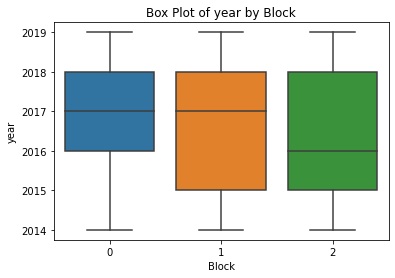

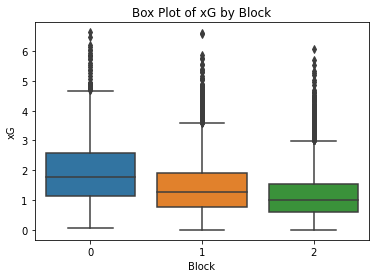

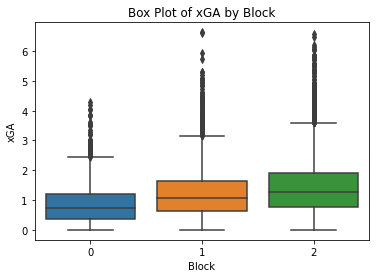

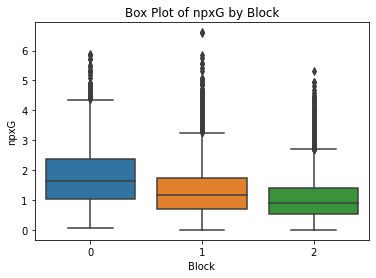

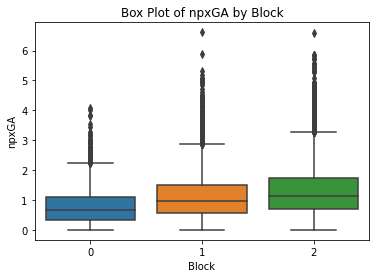

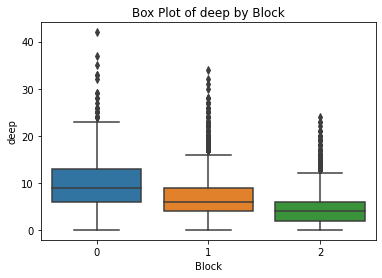

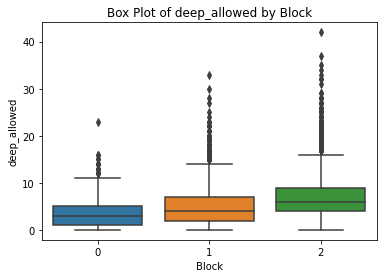

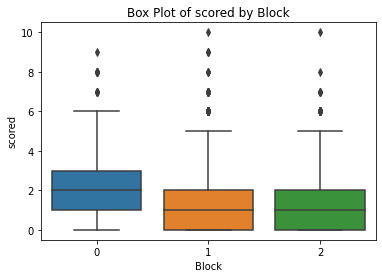

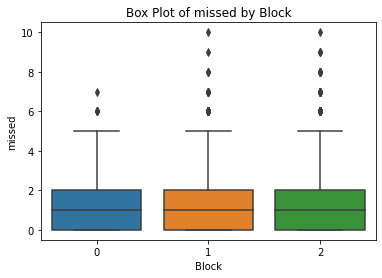

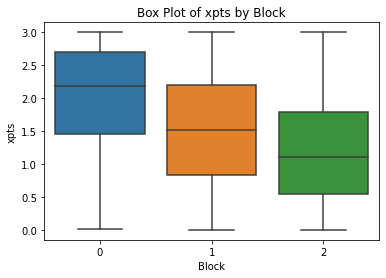

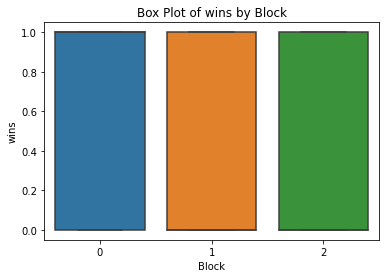

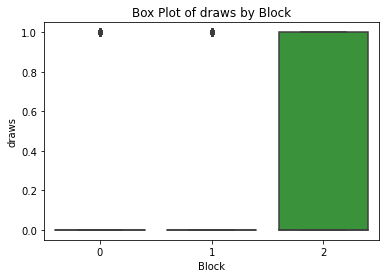

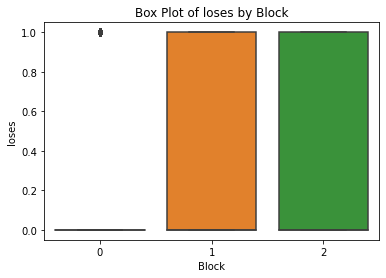

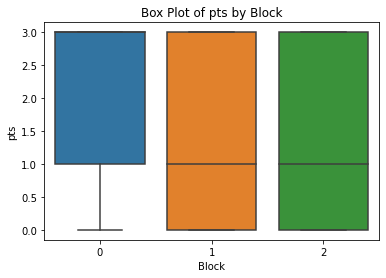

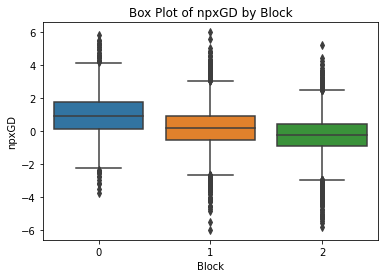

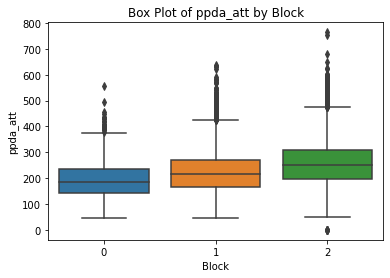

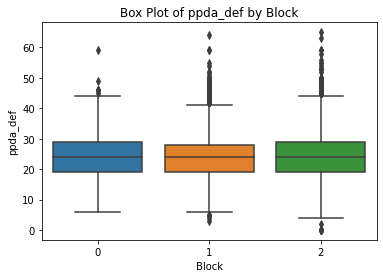

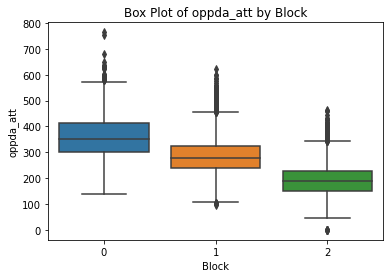

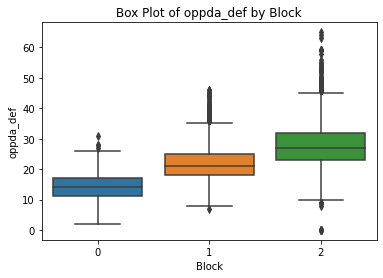

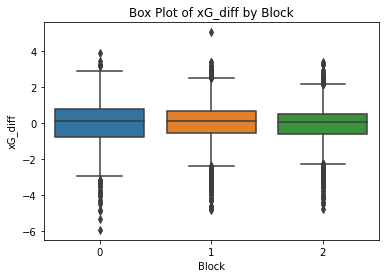

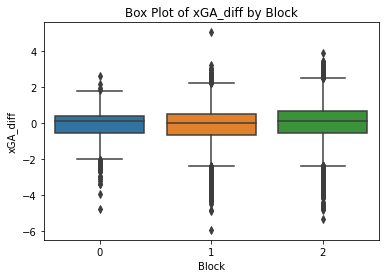

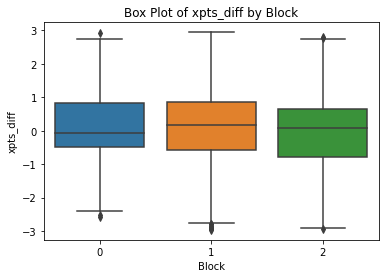

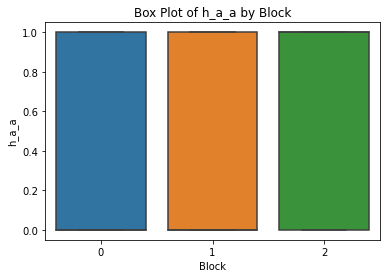

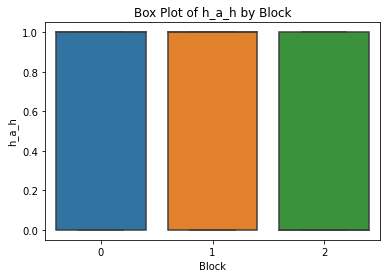

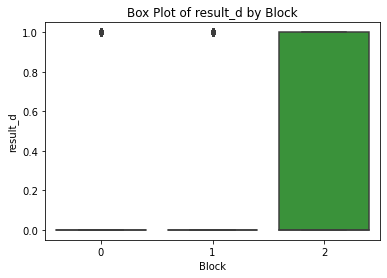

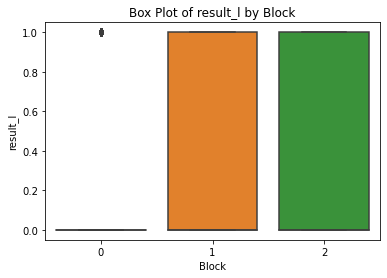

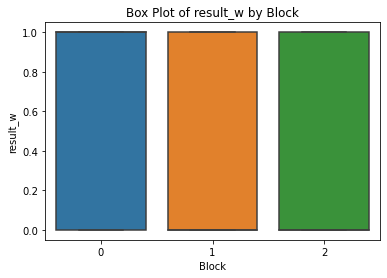

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in encoded_matches_per_game_2.columns:
    if column != 'block':
        sns.boxplot(x='block', y=column, data=encoded_matches_per_game_2)
        plt.title(f"Box Plot of {column} by Block")
        plt.xlabel('Block')
        plt.ylabel(column)
        plt.show()

In [50]:
from scipy import stats

In [51]:
variables = ['xG', 'xGA','npxG','npxG','scored','xpts','npxGD','deep','deep_allowed','ppda_att','ppda_def','oppda_def','oppda_att','xG_diff']

for var in variables:
    t_statistic, p_value = stats.ttest_ind(encoded_matches_per_game_2['block'], encoded_matches_per_game_2[var])
    print(p_value)
    if p_value < 0.05:
        print(f"There is a statistically significant difference between 'block' and '{var}'.")
    else:
        print(f"There is no statistically significant difference between 'block' and '{var}'.")

5.090948843774855e-132
There is a statistically significant difference between 'block' and 'xG'.
5.090948843774855e-132
There is a statistically significant difference between 'block' and 'xGA'.
0.0
There is a statistically significant difference between 'block' and 'npxG'.
0.0
There is a statistically significant difference between 'block' and 'npxG'.
3.62744057028988e-50
There is a statistically significant difference between 'block' and 'scored'.
7.401157690216292e-47
There is a statistically significant difference between 'block' and 'xpts'.
0.0
There is a statistically significant difference between 'block' and 'npxGD'.
0.0
There is a statistically significant difference between 'block' and 'deep'.
0.0
There is a statistically significant difference between 'block' and 'deep_allowed'.
0.0
There is a statistically significant difference between 'block' and 'ppda_att'.
0.0
There is a statistically significant difference between 'block' and 'ppda_def'.
0.0
There is a statistically si

In [52]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

variables_to_scale = ['xG', 'xGA', 'npxG', 'npxGA', 'scored', 'xpts', 'npxGD', 'deep', 'deep_allowed', 'ppda_att', 'ppda_def', 'oppda_def', 'oppda_att', 'xG_diff']

encoded_matches_per_game_2.columns = encoded_matches_per_game_2.columns.str.strip()

scaled_df = encoded_matches_per_game_2.copy()

scaler = RobustScaler()
scaled_values = scaler.fit_transform(scaled_df[variables_to_scale])
scaled_df[variables_to_scale] = scaled_values

print(scaled_df)

       year        xG       xGA      npxG     npxGA  deep  deep_allowed  \
0      2014  1.304363  0.043945  1.567461  0.161896   0.0          -0.2   
1      2014  0.324073  0.144589  0.474282  0.274130   1.0          -0.8   
2      2014  0.072844 -0.772247  0.194122 -0.748288   1.6          -0.4   
3      2014 -0.106043 -0.870611 -0.005364 -0.857979   0.2          -0.6   
4      2014  2.143055 -0.687088  2.502736 -0.653322   3.6          -0.6   
...     ...       ...       ...       ...       ...   ...           ...   
24575  2019 -0.645454  1.320471 -0.606893  0.805329   0.4           0.2   
24576  2019  0.504208 -0.646809 -0.104931 -0.608405   0.0           0.4   
24577  2019  1.272193 -0.175960  1.531587 -0.083333   0.0           0.4   
24578  2019  1.007787  1.413846  1.236733  1.689553   1.2           1.0   
24579  2019  0.720621  0.370862  0.136401  0.526460   0.2           0.2   

       scored  missed      xpts  ...  oppda_def   xG_diff  xGA_diff  \
0         0.5       1  0.740

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Average Train score: 0.9045211472251499
Average Validation score: 0.756928553267226
Average Test score: 0.7598454027664768
Average train precision score: [0.59510307 0.88188927 0.90131676]
Average train recalls score: [0.99926935 0.7442935  0.92388985]


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix:
[[ 254  104    2]
 [ 309 1208  391]
 [  17  313 2318]]


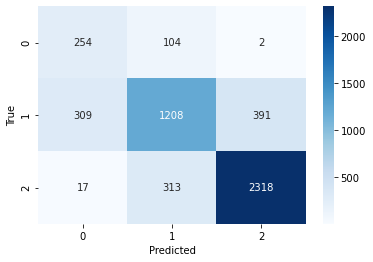

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.71      0.54       360
           1       0.74      0.63      0.68      1908
           2       0.86      0.88      0.87      2648

    accuracy                           0.77      4916
   macro avg       0.68      0.74      0.70      4916
weighted avg       0.78      0.77      0.77      4916



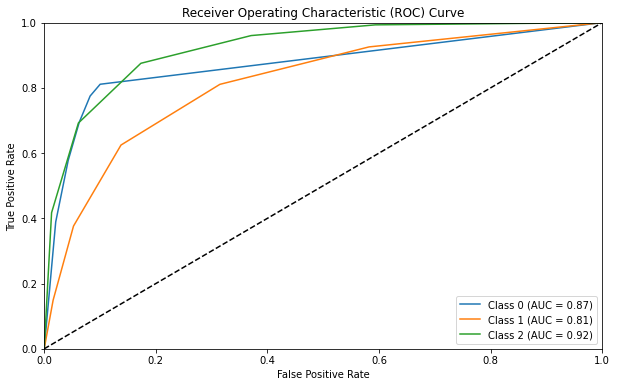

In [73]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = scaled_df.drop('block', axis=1)
y = scaled_df['block']

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

acc_train = []
acc_val = []
acc_test = []
precision_train = []
recall_train = []

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index] 
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_kf, y_train_kf, test_size=0.2, random_state=42)
    
    oversampler = RandomOverSampler(random_state=42, sampling_strategy='minority')
    X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
    
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_oversampled, y_train_oversampled)
    
    train_score = model.score(X_train_oversampled, y_train_oversampled)
    acc_train.append(train_score)
    
    val_score = model.score(X_val, y_val)
    acc_val.append(val_score)
    
    test_score = model.score(X_test_kf, y_test_kf)
    acc_test.append(test_score)
    
    y_pred_train = model.predict(X_train)

    precisions = precision_score(y_train, y_pred_train, average=None)
    precision_train.append(precisions)
    recalls = recall_score(y_train, y_pred_train, average=None)
    recall_train.append(recalls)
    
print(f"Average Train score: {sum(acc_train)/k}")
print(f"Average Validation score: {sum(acc_val)/k}")
print(f"Average Test score: {sum(acc_test)/k}")
print(f"Average train precision score: {sum(precision_train)/k}")
print(f"Average train recalls score: {sum(recall_train)/k}")


oversampler = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
model.fit(X_train_oversampled, y_train_oversampled)

y_pred = model.predict(X_test_kf)

cm = confusion_matrix(y_test_kf, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

cr = classification_report(y_test_kf, y_pred)
print("Classification Report:")
print(cr)

# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

num_classes = 3
# Convert the target labels to one-hot encoded format
y_test_one_hot = np.eye(num_classes)[y_test_kf]

# Calculate probabilities for each class
y_prob = model.predict_proba(X_test_kf)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Average Train score: 1.0
Average Validation score: 0.9627256547165015
Average Test score: 0.9619609438567942
Average train precision score: [1. 1. 1.]
Average train recalls score: [1. 1. 1.]
Confusion Matrix:
[[ 306   54    0]
 [  17 1849   42]
 [   0   49 2599]]


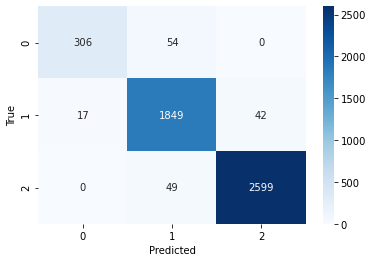

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       360
           1       0.95      0.97      0.96      1908
           2       0.98      0.98      0.98      2648

    accuracy                           0.97      4916
   macro avg       0.96      0.93      0.95      4916
weighted avg       0.97      0.97      0.97      4916



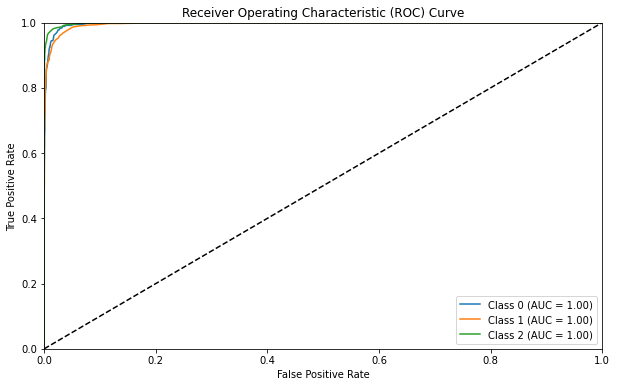

In [76]:
from sklearn.ensemble import RandomForestClassifier

X = scaled_df.drop('block', axis=1)
y = scaled_df['block']

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

acc_train = []
acc_val = []
acc_test = []
precision_train = []
recall_train = []

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index] 
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_kf, y_train_kf, test_size=0.2, random_state=42)
    
    oversampler = RandomOverSampler(random_state=42, sampling_strategy='minority')
    X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
    
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_oversampled, y_train_oversampled)
    
    train_score = model.score(X_train_oversampled, y_train_oversampled)
    acc_train.append(train_score)
    
    val_score = model.score(X_val, y_val)
    acc_val.append(val_score)
    
    test_score = model.score(X_test_kf, y_test_kf)
    acc_test.append(test_score)
    
    y_pred_train = model.predict(X_train)

    precisions = precision_score(y_train, y_pred_train, average=None)
    precision_train.append(precisions)
    recalls = recall_score(y_train, y_pred_train, average=None)
    recall_train.append(recalls)
    
print(f"Average Train score: {sum(acc_train)/k}")
print(f"Average Validation score: {sum(acc_val)/k}")
print(f"Average Test score: {sum(acc_test)/k}")
print(f"Average train precision score: {sum(precision_train)/k}")
print(f"Average train recalls score: {sum(recall_train)/k}")

oversampler = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
model.fit(X_train_oversampled, y_train_oversampled)

y_pred = model.predict(X_test_kf)

cm = confusion_matrix(y_test_kf, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

cr = classification_report(y_test_kf, y_pred)
print("Classification Report:")
print(cr)

# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

num_classes = 3
# Convert the target labels to one-hot encoded format
y_test_one_hot = np.eye(num_classes)[y_test_kf]

# Calculate probabilities for each class
y_prob = model.predict_proba(X_test_kf)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Average Train score: 0.9864725700845465
Average Validation score: 0.9812356979405035
Average Test score: 0.9814076484947112
Average train precision score: [0.85780889 0.99827717 0.99740459]
Average train recalls score: [1.         0.96682424 0.99880396]
Confusion Matrix:
[[ 288    2    0]
 [  91 1824   19]
 [   0   10 2682]]


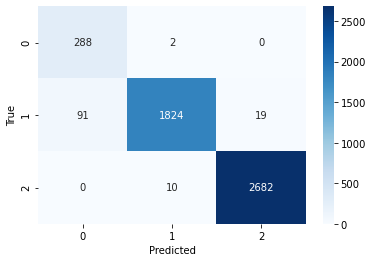

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       290
           1       0.99      0.94      0.97      1934
           2       0.99      1.00      0.99      2692

    accuracy                           0.98      4916
   macro avg       0.92      0.98      0.94      4916
weighted avg       0.98      0.98      0.98      4916



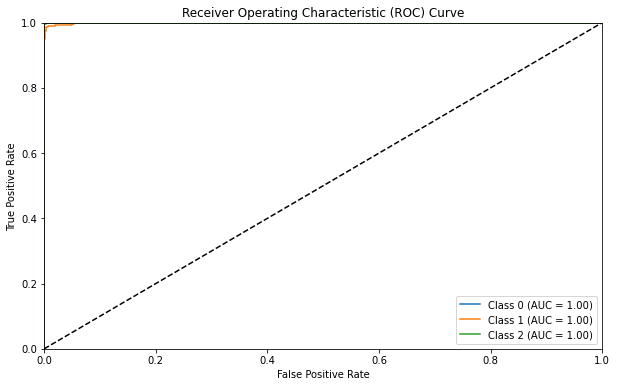

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

X = scaled_df.drop('block', axis=1)
y = scaled_df['block']

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

acc_train = []
acc_val = []
acc_test = []
precision_train = []
recall_train = []

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index] 
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_kf, y_train_kf, test_size=0.2, random_state=42)
    
    oversampler = RandomOverSampler(random_state=42, sampling_strategy='minority')
    X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
    
    model = GradientBoostingClassifier() 
    model.fit(X_train_oversampled, y_train_oversampled)
    
    train_score = model.score(X_train, y_train)
    acc_train.append(train_score)
    
    val_score = model.score(X_val, y_val)
    acc_val.append(val_score)
    
    test_score = model.score(X_test_kf, y_test_kf)
    acc_test.append(test_score)
    
    y_pred_train = model.predict(X_train)

    precisions = precision_score(y_train, y_pred_train, average=None)
    precision_train.append(precisions)
    recalls = recall_score(y_train, y_pred_train, average=None)
    recall_train.append(recalls)
    
print(f"Average Train score: {sum(acc_train)/k}")
print(f"Average Validation score: {sum(acc_val)/k}")
print(f"Average Test score: {sum(acc_test)/k}")
print(f"Average train precision score: {sum(precision_train)/k}")
print(f"Average train recalls score: {sum(recall_train)/k}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

model = GradientBoostingClassifier()
model.fit(X_train_oversampled, y_train_oversampled)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

num_classes = 3
# Convert the target labels to one-hot encoded format
y_test_one_hot = np.eye(num_classes)[y_test_kf]

# Calculate probabilities for each class
y_prob = model.predict_proba(X_test_kf)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Average Train score: 0.9613247727417201
Average Validation score: 0.9619120264429188
Average Test score: 0.9590724165988609
Average train precision score: [0.86581742 0.94368124 0.99388413]
Average train recalls score: [0.98841354 0.95971401 0.95907467]
Confusion Matrix:
[[ 244   46    0]
 [   0 1934    0]
 [   0  133 2559]]


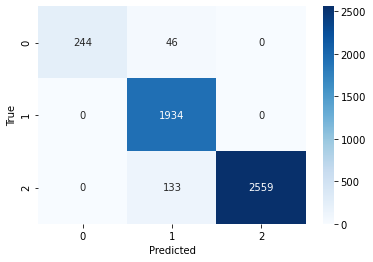

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       290
           1       0.92      1.00      0.96      1934
           2       1.00      0.95      0.97      2692

    accuracy                           0.96      4916
   macro avg       0.97      0.93      0.95      4916
weighted avg       0.97      0.96      0.96      4916



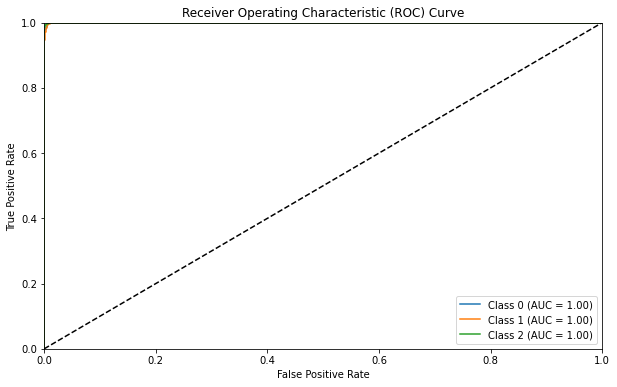

In [80]:
from sklearn.neural_network import MLPClassifier

X = scaled_df.drop('block', axis=1)
y = scaled_df['block']

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

acc_train = []
acc_val = []
acc_test = []
precision_train = []
recall_train = []

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index] 
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_kf, y_train_kf, test_size=0.2, random_state=42)
    
    oversampler = RandomOverSampler(random_state=42, sampling_strategy='minority')
    X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
    
    model = MLPClassifier()
    model.fit(X_train_oversampled, y_train_oversampled)
    
    train_score = model.score(X_train, y_train)
    acc_train.append(train_score)
    
    val_score = model.score(X_val, y_val)
    acc_val.append(val_score)
    
    test_score = model.score(X_test_kf, y_test_kf)
    acc_test.append(test_score)
    
    y_pred_train = model.predict(X_train)

    precisions = precision_score(y_train, y_pred_train, average=None)
    precision_train.append(precisions)
    recalls = recall_score(y_train, y_pred_train, average=None)
    recall_train.append(recalls)
    
    
print(f"Average Train score: {sum(acc_train)/k}")
print(f"Average Validation score: {sum(acc_val)/k}")
print(f"Average Test score: {sum(acc_test)/k}")
print(f"Average train precision score: {sum(precision_train)/k}")
print(f"Average train recalls score: {sum(recall_train)/k}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

model = MLPClassifier()
model.fit(X_train_oversampled, y_train_oversampled)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

# Convert the target labels to one-hot encoded format
y_test_one_hot = np.eye(num_classes)[y_test]

# Calculate probabilities for each class
y_prob = model.predict_proba(X_test)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()